____
__Universite de Technologie de Troyes__<br/>
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Master OSS__<br/>
__Machine Learning & Pattern Recognition__<br/>
__Practice Sessions__<br/>
__Teacher: Martin Palazzo__
____

# Import Libraries

Import useful libraries mainly Numpy for calculus and Seaborn and Matplotlib for visualization.

In [0]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_context("talk", font_scale=0.85)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
sns.set_context("talk", font_scale=1.4)
sns.set_style("whitegrid")

In [0]:
# Function to plot decision function of SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [0]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

# SVM without kernels, separated cases

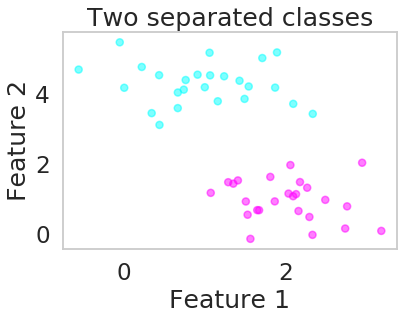

In [5]:
# first we generate some random data of two separated classes
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)

# make scatter plot with the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool', alpha = 0.5);
plt.title("Two separated classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(False)

In [6]:
# Import a SVM model from sklearn
from sklearn.svm import SVC # "Support vector classifier"

# define the type of kernel and it C parameter
model = SVC(kernel='linear', C=1E10)

# Train the SVC model using the training data
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

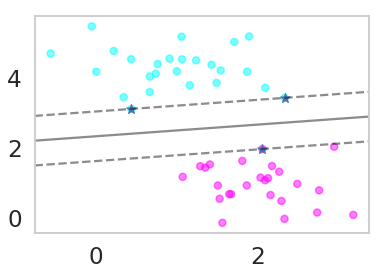

In [7]:
# plot the training samples, the decision function, the margin and the support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool', alpha = 0.5)
plot_svc_decision_function(model);
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, lw=1, marker = '*', cmap = 'viridis');
plt.grid(False)

In [8]:
# print the support vectors of the problem
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])


## **The effect of adding more samples that are not part of the optimal solution**

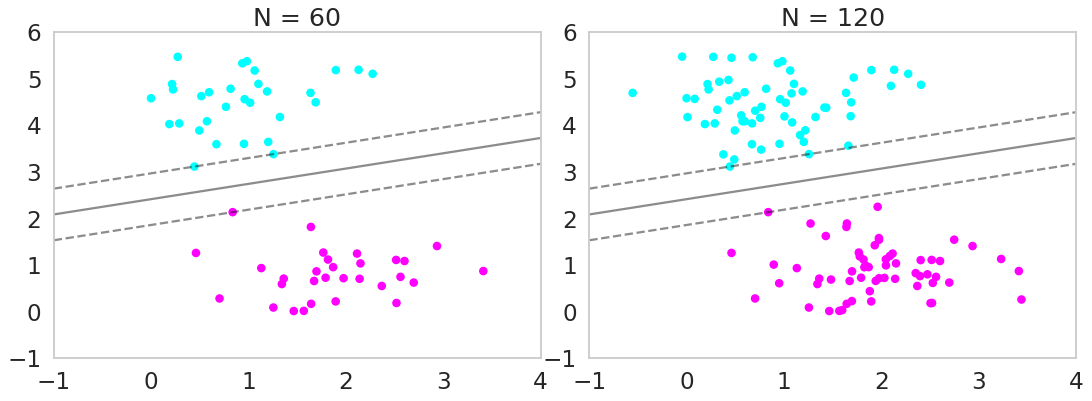

In [9]:
# just a visualization to see that more samples that are not part of the solution does not change the problem!
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
    axi.grid(False)

# SVM without kernels, overlaped cases

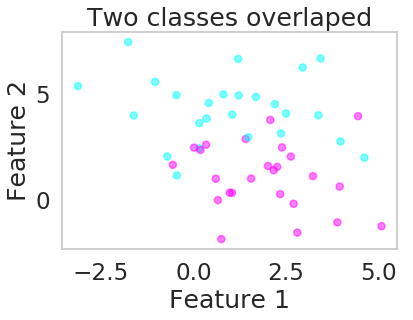

In [10]:
# generate a new dataset with more standard deviation and obtain overlaped classes
from sklearn.datasets.samples_generator import make_blobs
X1, y1 = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1.60)

# visualize the samples
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='cool', alpha = 0.5);
plt.title("Two classes overlaped")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(False)

In [11]:
# train a SVM model using linear kernel
from sklearn.svm import SVC # "Support vector classifier"

# define de model with its kernel and it C parameter
model1 = SVC(kernel='linear', C=1E10)

# Fit the model using the training data
model1.fit(X1, y1)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

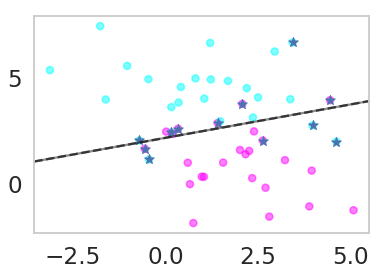

In [12]:
# Plot the decision function and the data.
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='cool', alpha = 0.5)
plot_svc_decision_function(model1);
plt.scatter(model1.support_vectors_[:, 0], model1.support_vectors_[:, 1], s=100, lw=1, marker = '*', cmap = 'viridis');
plt.grid(False)

###### Play with different values of C to see if there is a change in the solution #######
###### Play with different values of C to see if there is a change in the solution #######
###### Play with different values of C to see if there is a change in the solution #######

In [13]:
# count the number of support vectors
np.shape(model1.support_vectors_)[0]

12

In [14]:
# print the support vectors
model1.support_vectors_

array([[-0.44418712,  1.13451298],
       [ 4.60787748,  1.97680225],
       [ 3.96436286,  2.74014272],
       [ 3.42871682,  6.65476136],
       [ 0.15898186,  2.41477583],
       [-0.70141467,  2.03175863],
       [ 0.34206333,  2.58478642],
       [ 1.41018441,  2.85357577],
       [ 2.07206755,  3.75505645],
       [ 2.62545376,  2.02818073],
       [-0.55304983,  1.63811527],
       [ 4.43647103,  3.93108634]])

In [15]:
# print the alpha parameters of the support vectors
model1.dual_coef_

array([[-1.00000000e+10, -1.00000000e+10, -6.77198269e+09,
        -7.74114673e+09, -8.76568030e+09, -1.00000000e+10,
         1.00000000e+10,  1.00000000e+10,  3.27880972e+09,
         1.00000000e+10,  1.00000000e+10,  1.00000000e+10]])

In [16]:
# check how many support vectors are per class
model1.n_support_

array([6, 6], dtype=int32)

In [17]:
# plot the resulting value of each sample against the decision function.
model1.decision_function(X1)


array([ -4428.32983415,  -3483.74459855, -22684.60021989, -10405.22412125,
        20007.48062118,  61263.00823958,  68913.68920882, -12997.75903336,
        16582.17904647, -80044.563965  , -43186.08563249, -51096.36929337,
       -32535.20190446,  32872.96110519,  -2972.61807267,  -4342.46536271,
       -21341.28347794,  44048.52224715,  12087.18755706, -35042.12335221,
        29764.33289321,  13136.22946151,  18749.82704909,  29429.25172408,
        28425.60742171,  22450.95471175, -19205.94107072, -57406.50816361,
        36262.74266036,   9166.58685287,   6169.25204452, -40025.6490175 ,
       -29549.63620011, -31832.74375932, -46954.55889909,  22796.28442367,
        18238.9770201 , -56271.81097428,  63209.2596968 ,  -2887.05775468,
         4693.89536269, -15367.81570451,  58502.55053695,  -1706.38710038,
       -20863.36773698,  -3945.93457047,  -5149.3561403 ,  -1359.8676912 ,
        38342.11587508, -31151.97457902])

# SVM with Kernels

### SVM with circular data, 2 separated classes

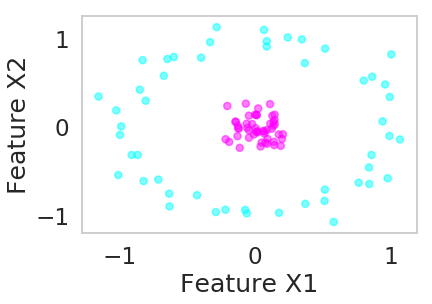

In [18]:
# Generate circular data, separated classes
from sklearn.datasets.samples_generator import make_circles
X2, y2 = make_circles(100, factor=.1, noise=.1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='cool', alpha = 0.5)
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.grid(False)

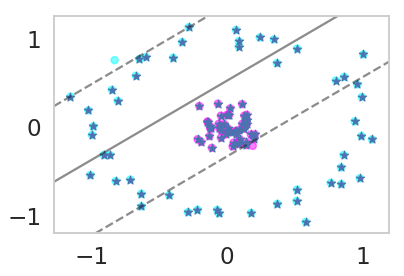

In [19]:
# Train a linear kernel
clf2 = SVC(kernel='linear', C = 10000).fit(X2, y2)

# plot data, decision function, margins and support vectors
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='cool', alpha = 0.5)
plot_svc_decision_function(clf2, plot_support=False);
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80, lw=1, marker = '*', cmap = 'viridis');
plt.grid(False)

In [20]:
# plot the number of support vectors
np.shape(clf2.support_vectors_)[0]

98

In [21]:
# Using exactly the same dataset train a new support vector classifier "clf2b" but using a Gaussian Kernel

# define de model
clf2b = SVC(kernel='rbf', C=1E6, gamma = 1)

# train the model
clf2b.fit(X2, y2)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

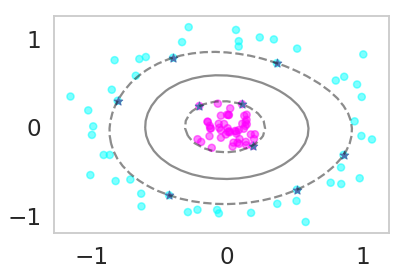

In [22]:
# visualize the training samples, the decision function and the support vectors
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='cool', alpha = 0.5)
plot_svc_decision_function(clf2b)
plt.scatter(clf2b.support_vectors_[:, 0], clf2b.support_vectors_[:, 1], s=80, lw=1, marker = '*', cmap = 'viridis');
plt.grid(False)
plt.show()

In [23]:
# count the number of support vectors
np.shape(clf2b.support_vectors_)[0]

9

### SVM with circular data, 2 overlaped classes

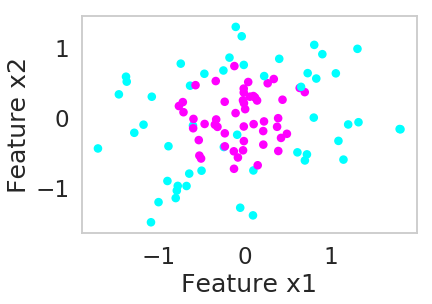

In [24]:
# Define a circular dataset with two overlapped classes
from sklearn.datasets.samples_generator import make_circles
X3, y3 = make_circles(100, factor=.1, noise=.4)

# visualize the data
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.grid(False)



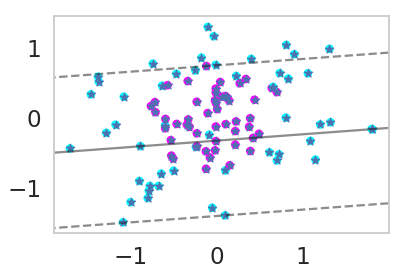

In [25]:
clf3 = SVC(kernel='linear').fit(X3, y3)

#plt.figsize(10,16)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plot_svc_decision_function(clf3, plot_support=False);
plt.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1],
            s=80, lw=1, marker = '*', cmap = 'viridis')
plt.grid(False)

In [36]:
# count the number of support vectors
np.shape(clf3.support_vectors_)[0]

100

In [33]:
clf3b = SVC(kernel='rbf', C=1E6, gamma = 0.15)
clf3b.fit(X3, y3)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.15, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

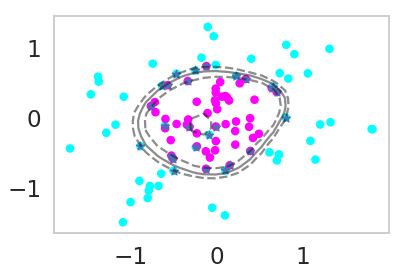

In [34]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plot_svc_decision_function(clf3b)
plt.scatter(clf3b.support_vectors_[:, 0], clf3b.support_vectors_[:, 1],
            s=80, lw=1, marker = '*', cmap = 'viridis')
plt.grid(False)

In [35]:
# count the number of support vectors
np.shape(clf3b.support_vectors_)[0]

26

# SVM Soft Margin

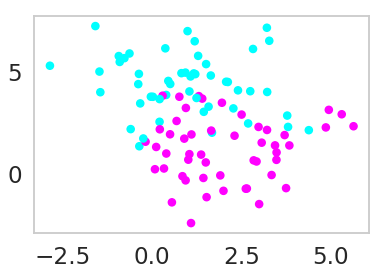

In [38]:
#generate overlaped classes

X3, y3 = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.5)

# plot data
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool');
plt.grid(False)

In [0]:
# generate different models with different values of C parameter using linear kernel
model3 = SVC(kernel='linear', C=0.003).fit(X3, y3)
model4 = SVC(kernel='linear', C=0.01).fit(X3, y3)
model5 = SVC(kernel='linear', C=0.1).fit(X3, y3)
model6 = SVC(kernel='linear', C=10).fit(X3, y3)

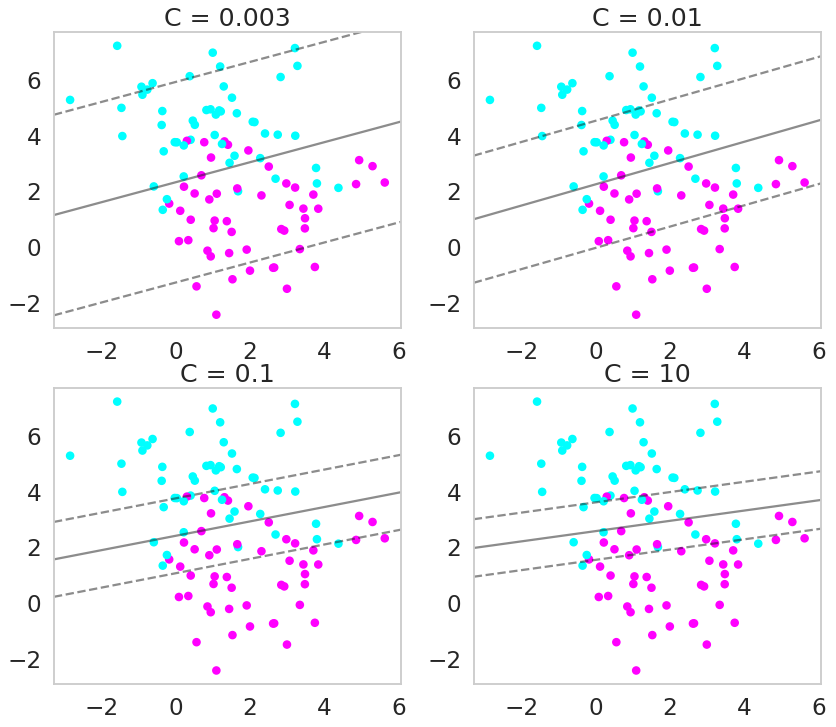

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.21)

ax[0,0].scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plot_svc_decision_function(model3,ax[0,0])
ax[0,0].scatter(model3.support_vectors_[:, 0], model3.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
ax[0,0].grid(False)
ax[0,0].title.set_text('C = 0.003')

ax[0,1].scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plot_svc_decision_function(model4,ax[0,1])
ax[0,1].scatter(model4.support_vectors_[:, 0], model4.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
ax[0,1].grid(False)
ax[0,1].title.set_text('C = 0.01')

ax[1,0].scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plot_svc_decision_function(model5,ax[1,0])
ax[1,0].scatter(model5.support_vectors_[:, 0], model5.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
ax[1,0].grid(False)
ax[1,0].title.set_text('C = 0.1')

ax[1,1].scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='cool')
plot_svc_decision_function(model6,ax[1,1])
ax[1,1].scatter(model6.support_vectors_[:, 0], model6.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
ax[1,1].grid(False)
ax[1,1].title.set_text('C = 10')

plt.show()

In [0]:
# Determine and print the number of support vectors of the last 4 models

####### Code here ########

####### Code here ########

In [0]:
# Compute the training accuracy of each of the last 4 models and analyze its relation with the C parameter and the number of support vectors

####### Code here ########

####### Code here ########

### Exercise with SVMs: 
Load the Breast cancer dataset. Train an SVM classifier using 5-fold cross validation using 80% of the samples for training.

In [0]:
# Load breast cancer data
from sklearn.datasets import load_breast_cancer
data_breast = load_breast_cancer()
y_breast = data_breast.target
x_breast = data_breast.data

**Tip1**: For train and test split look at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**Tip1**: For cross validation and grid search of hyperparameters look at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [0]:
####### Code here ########

####### Code here ########